In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
trainData = pd.read_csv('train.csv')
trainData = trainData.drop('Id', axis=1)

In [2]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')   

trainData['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']

trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)

trainData = trainData.drop('Open Date', axis=1)

In [3]:
cityPerc = trainData[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()
#sns.barplot(x='City Group', y='revenue', data=cityPerc)

citygroupDummy = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(citygroupDummy)

trainData = trainData.drop('City Group', axis=1)

<AxesSubplot:>

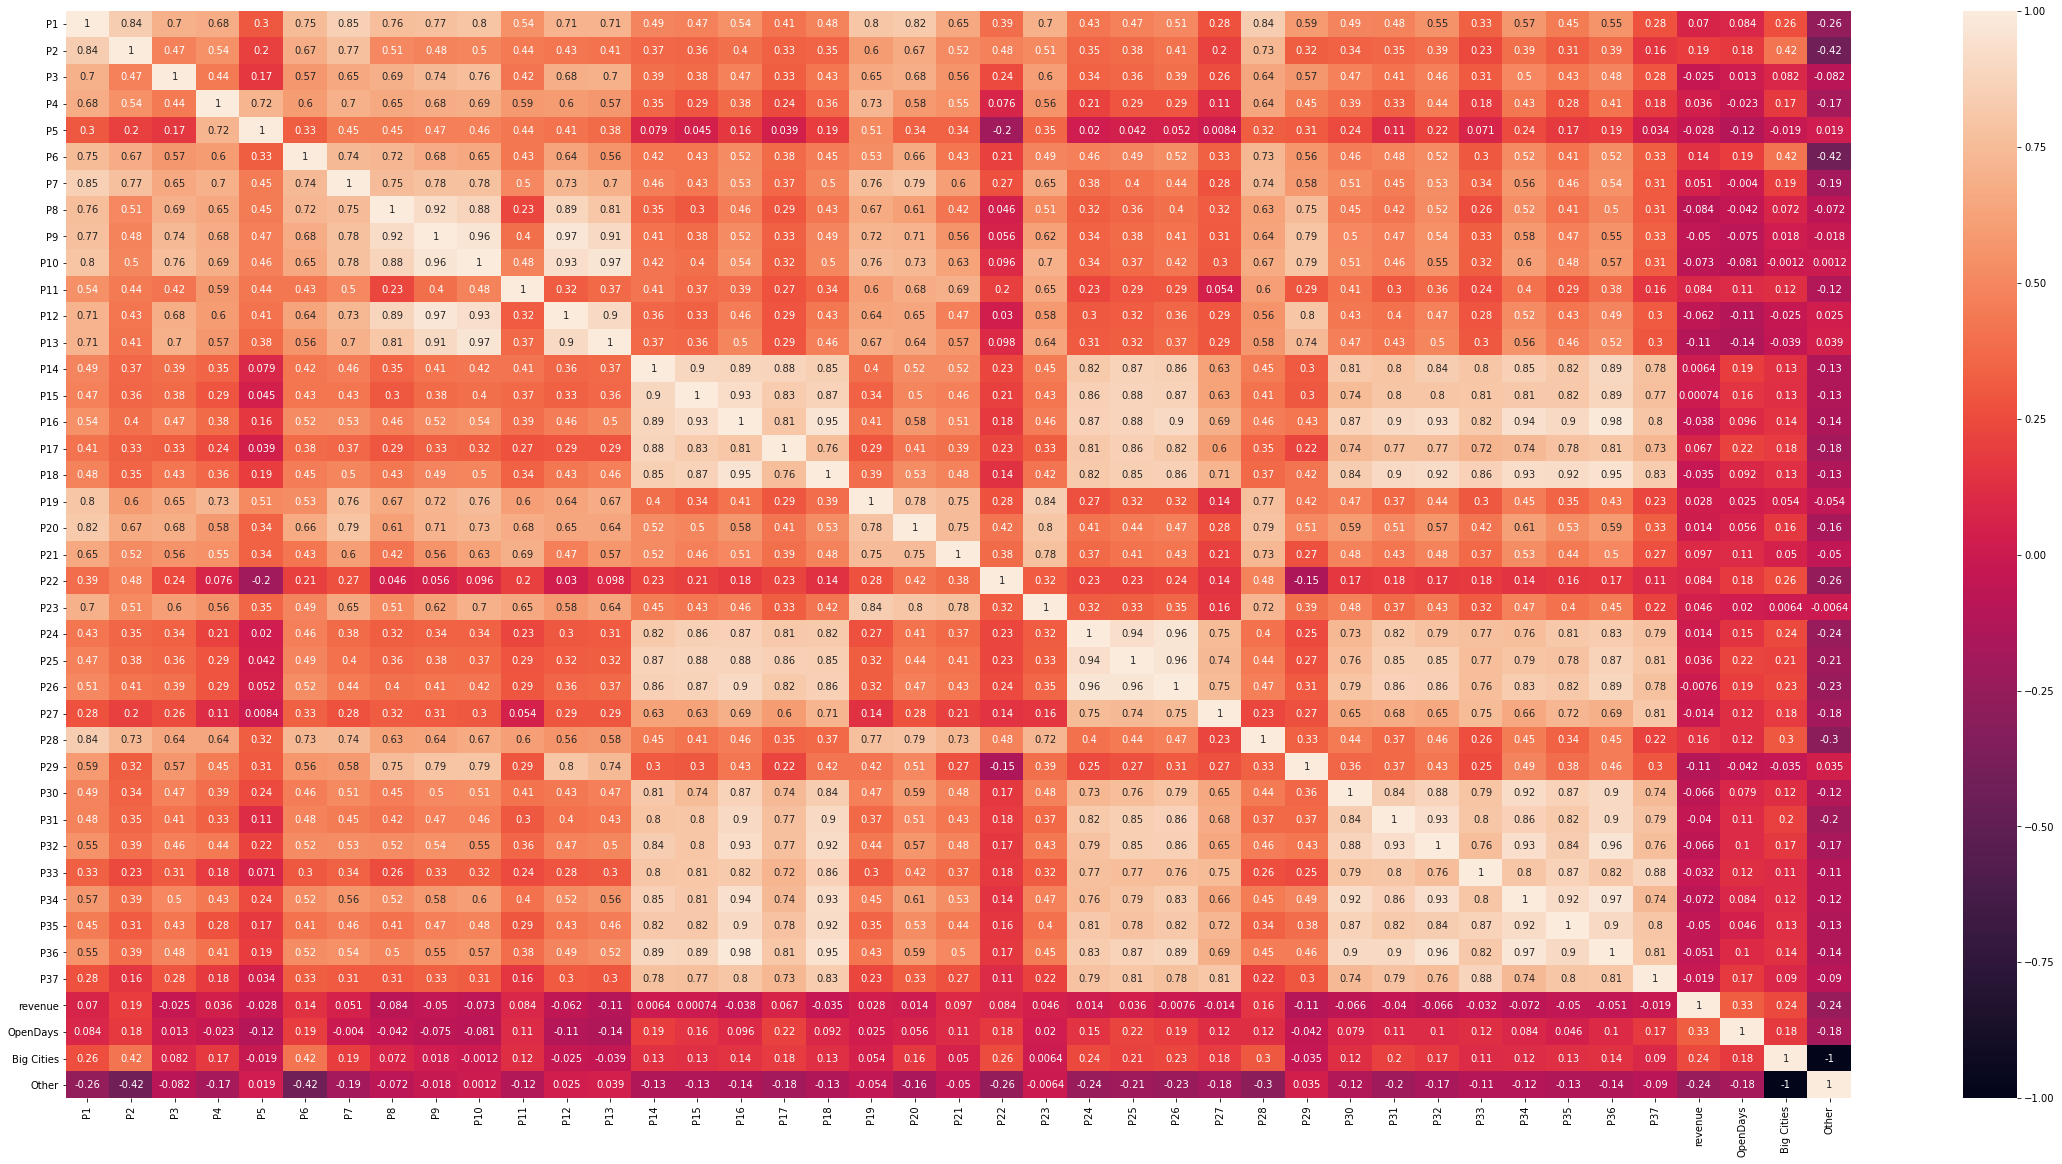

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40,20))
sns.heatmap(trainData.corr(),annot = True)

In [24]:
x = trainData.drop(['City','Type','revenue'], axis=1)
x['OpenDays']=(x['OpenDays']).apply(np.log)
y = trainData['revenue'].apply(np.log)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_train, y_pred=linreg.predict(X_train))
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_train, y_pred=linreg.predict(X_train))

0.2440169457034726

In [28]:
linreg.score(x, y)

-0.03619198954696601

In [29]:
def plot_revenue(y, y_pred, data_string):
    plt.figure(figsize=(20, 10))
    plt.plot(range(0, len(y)), y, label="TrueValues", marker="*", linewidth=3)
    plt.plot(range(0, len(y)), y_pred, label="PredictedValues", marker="o", linewidth=3)
    plt.xlabel("attribute", fontsize=20)
    plt.ylabel("revenue", fontsize=20)
    plt.title("revenue " + data_string, fontsize=20)
    plt.legend()

In [30]:
def apply_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    # Train data 
    mse = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mae = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train))
    r2 = model.score(X_train, y_train)

    print("MSE on train data: ", mse)
    print("MAE on train data: ", mae)
    print("R squared on train data: ", r2)  
    
    print()
    print("#"*50)
    print()
       
    mse = mean_squared_error(y_true=y_test, y_pred=linreg.predict(X_test))
    mae = mean_absolute_error(y_true=y_test, y_pred=linreg.predict(X_test))
    r2 = linreg.score(X_test, y_test)

    print("MSE on test data: ", mse)
    print("MAE on test data: ", mae)
    print("R squared on test data: ", r2)
    
    print()
    print("#"*50)
    print()
    
    plot_revenue(y_train, model.predict(X_train), "TRAINING SET")
    
    plot_revenue(y_test, model.predict(X_test), "TEST SET")

In [31]:
from sklearn.linear_model import Ridge
ridreg = Ridge()

MSE on train data:  0.09632496634295616
MAE on train data:  0.24286692218594869
R squared on train data:  0.563225274819569

##################################################

MSE on test data:  0.5598965813637312
MAE on test data:  0.5480534112729446
R squared on test data:  -1.2620000484335954

##################################################



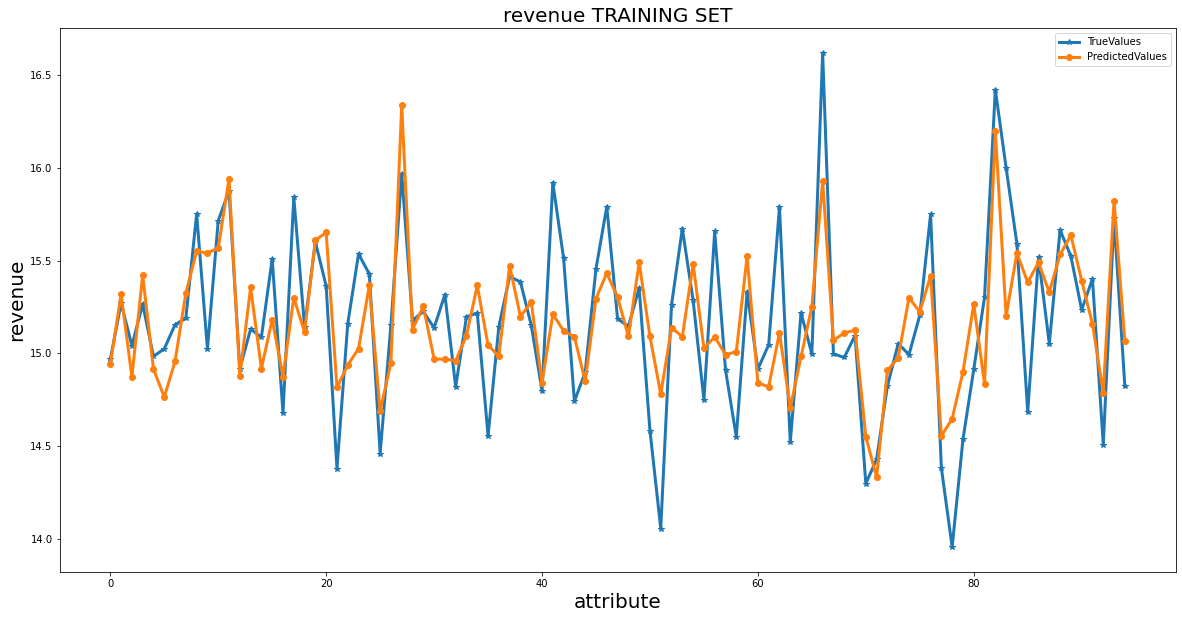

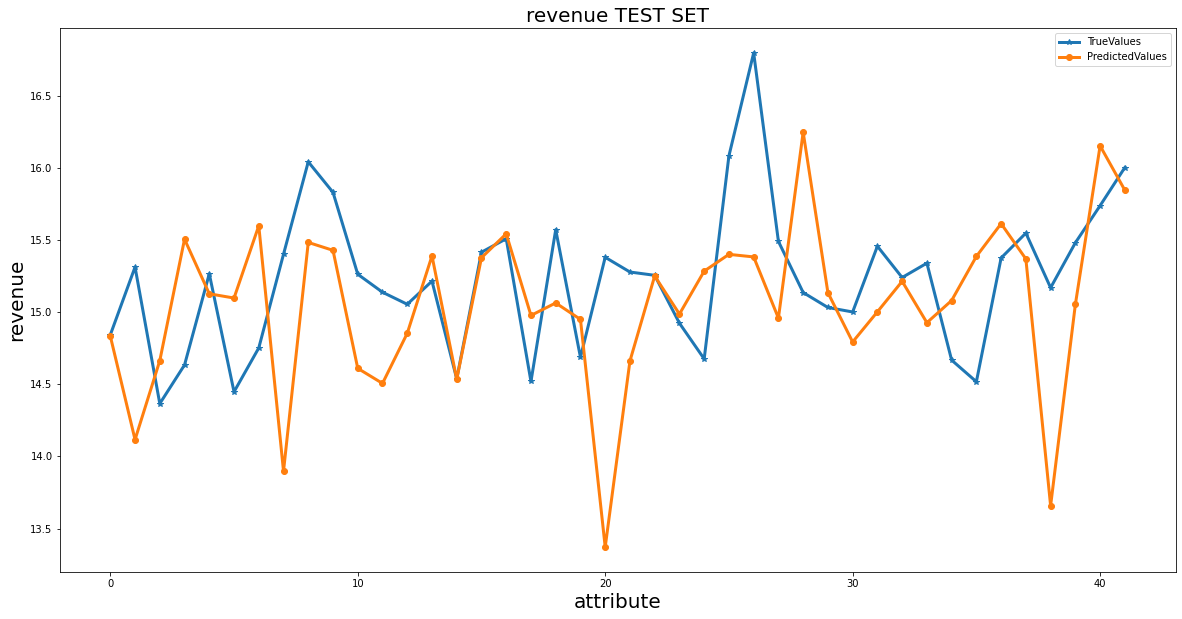

In [32]:
apply_model(ridreg, X_train, y_train, X_test, y_test)

In [35]:
from sklearn.model_selection import GridSearchCV
params = {"alpha": [.01, .1, .5, .7, 1, 1.5, 2, 2.5, 3, 5, 10,12,13,15,16,18,20,21,25,30,35,40,50,60,70,80,90,100]}
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5,
                                   10, 12, 13, 15, 16, 18, 20, 21, 25, 30, 35,
                                   40, 50, 60, 70, 80, 90, 100]},
             return_train_score=True)

In [36]:
clf.cv_results_

{'mean_fit_time': array([0.0069448 , 0.00457239, 0.00478716, 0.00319123, 0.0031847 ,
        0.0028069 , 0.00299358, 0.00298362, 0.00317011, 0.0031858 ,
        0.00317907, 0.00298233, 0.00293436, 0.00299106, 0.00338273,
        0.00318384, 0.00300221, 0.00299473, 0.00329475, 0.00291014,
        0.00278177, 0.00280666, 0.00278635, 0.00279231, 0.00239711,
        0.00259352, 0.00299206, 0.00244694]),
 'std_fit_time': array([2.57363030e-03, 4.92393303e-04, 7.46149407e-04, 3.98636235e-04,
        3.83187557e-04, 4.09228000e-04, 2.04657042e-05, 1.25394574e-05,
        3.91459714e-04, 3.97704327e-04, 4.04612499e-04, 6.25737860e-04,
        5.27653284e-04, 3.32284000e-06, 4.94630183e-04, 3.82662221e-04,
        1.95482299e-05, 2.48250419e-05, 3.98748367e-04, 1.69485394e-04,
        3.94251938e-04, 3.97659834e-04, 3.95253752e-04, 3.98731317e-04,
        4.85507586e-04, 4.88908814e-04, 8.47644274e-07, 5.60141614e-04]),
 'mean_score_time': array([0.00411453, 0.00262575, 0.0027997 , 0.00179543, 

In [37]:
clf.best_estimator_

Ridge(alpha=40)

MSE on train data:  0.1268911478073319
MAE on train data:  0.2716296178258998
R squared on train data:  0.42462636307549906

##################################################

MSE on test data:  0.5598965813637312
MAE on test data:  0.5480534112729446
R squared on test data:  -1.2620000484335954

##################################################



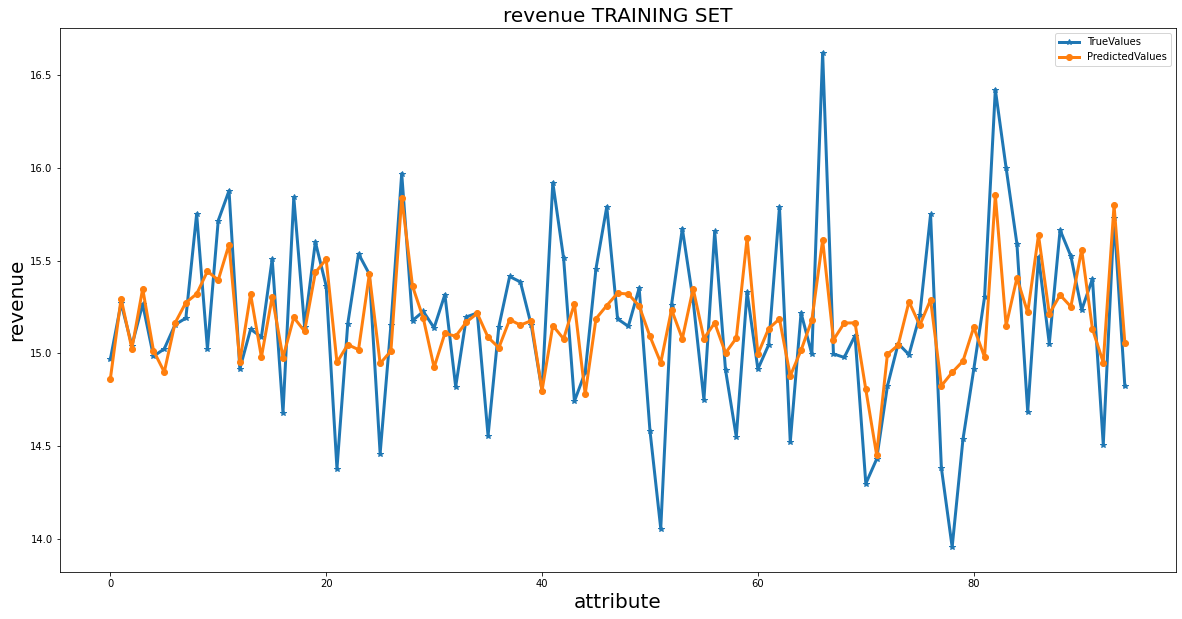

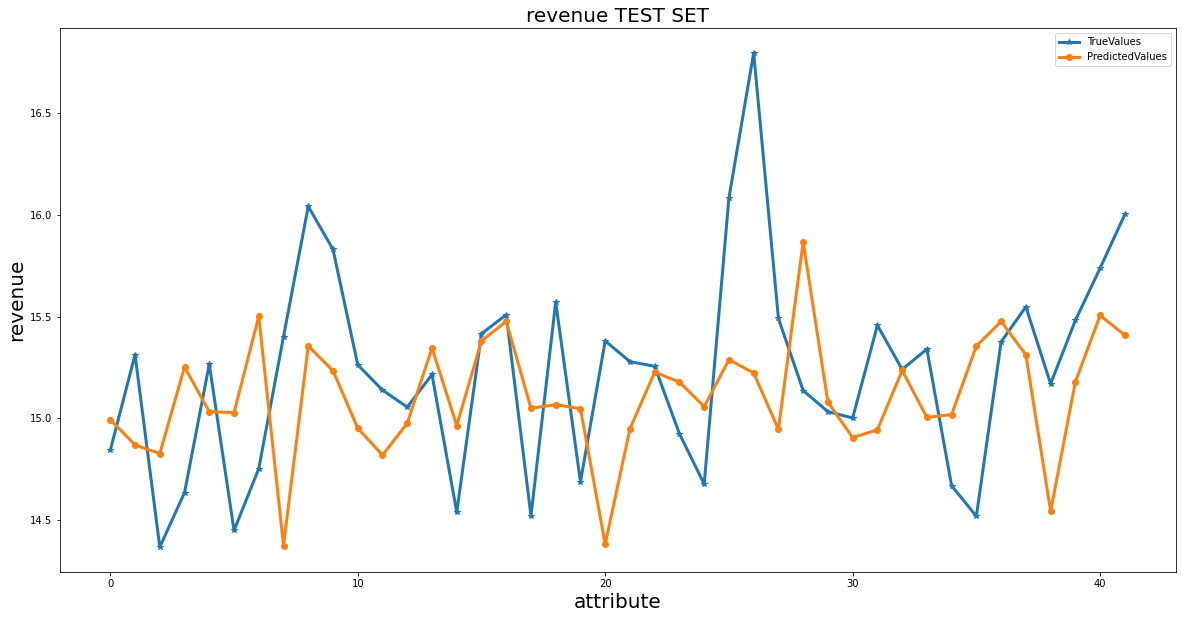

In [38]:
# With best value of alpha
ridreg = Ridge(alpha=40)
apply_model(ridreg, X_train, y_train, X_test, y_test)

MSE on train data:  0.12167386053291825
MAE on train data:  0.2663382140348595
R squared on train data:  0.44828356537709135

##################################################

MSE on test data:  0.5598965813637312
MAE on test data:  0.5480534112729446
R squared on test data:  -1.2620000484335954

##################################################



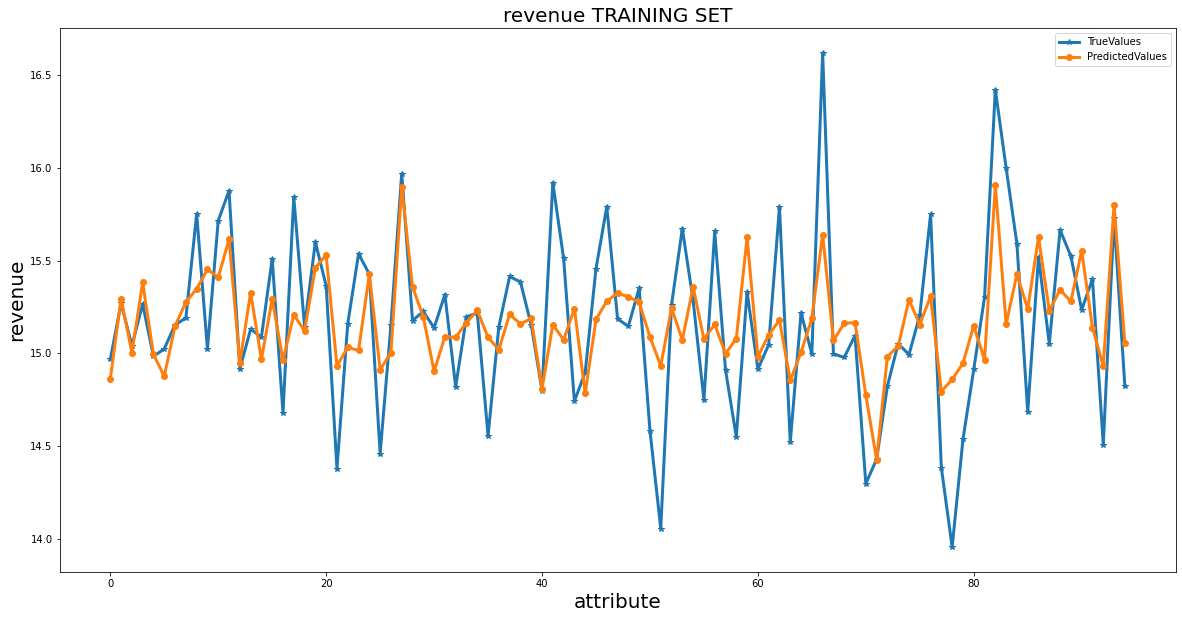

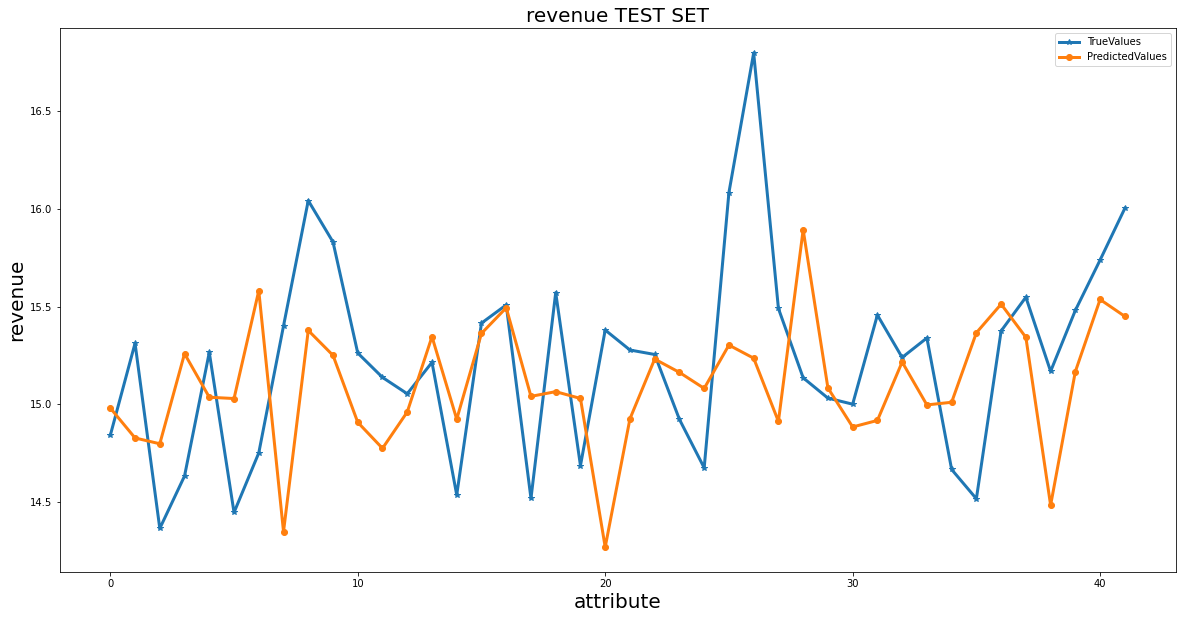

In [39]:
# With best value of alpha
ridreg = Ridge(alpha=30)
apply_model(ridreg, X_train, y_train, X_test, y_test)

MSE on train data:  0.09632496634295616
MAE on train data:  0.24286692218594869
R squared on train data:  0.563225274819569

##################################################

MSE on test data:  0.5598965813637312
MAE on test data:  0.5480534112729446
R squared on test data:  -1.2620000484335954

##################################################



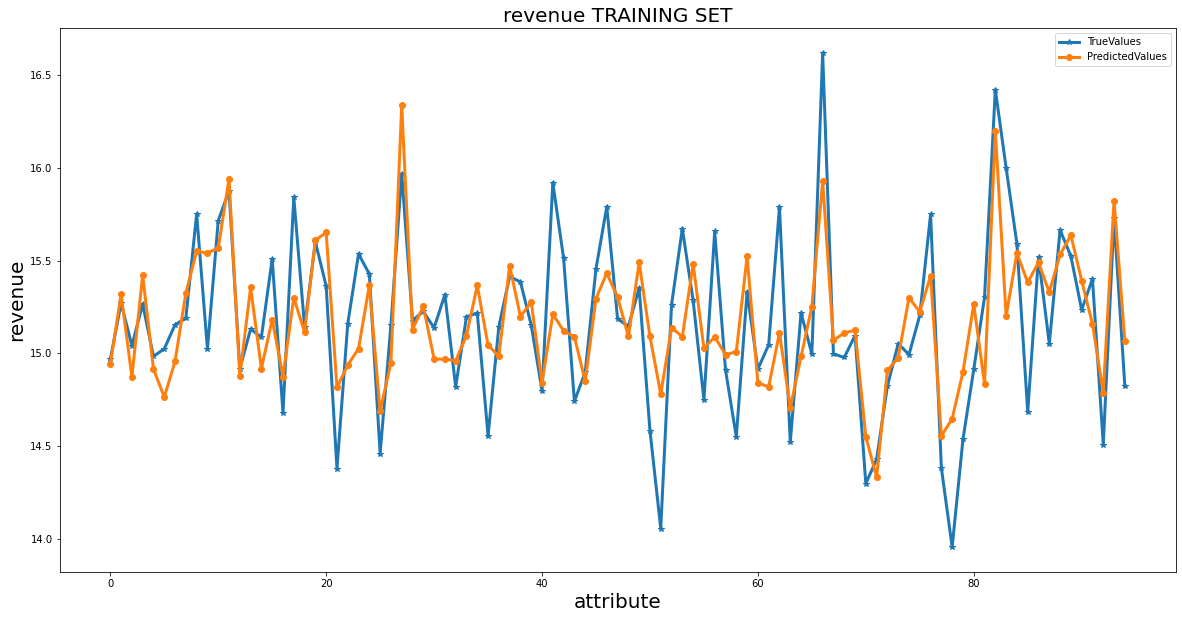

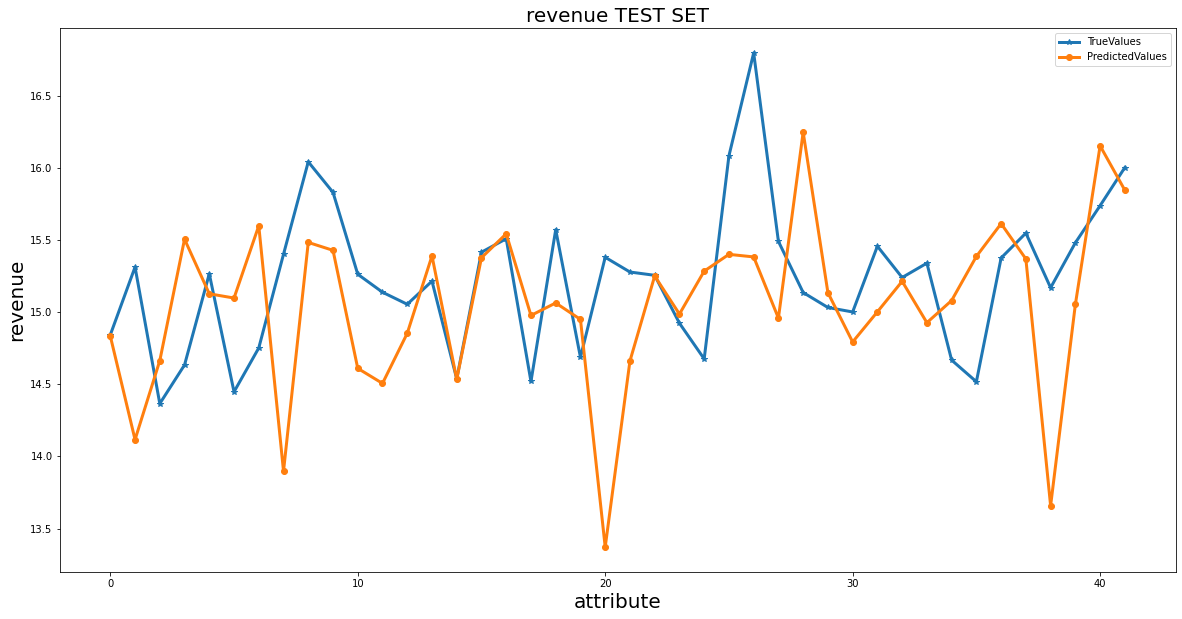

In [43]:
# With best value of alpha
ridreg = Ridge(alpha=1)
apply_model(ridreg, X_train, y_train, X_test, y_test)

underfitting_learning_curves_plot


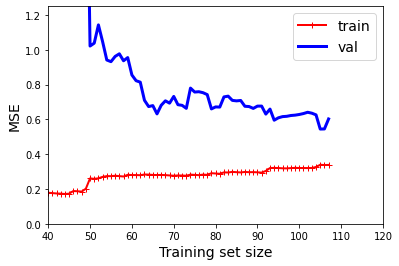

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("MSE", fontsize=14)              
lin_reg = LinearRegression()
print("underfitting_learning_curves_plot")
plot_learning_curves(linreg, x, y)

plt.axis([40, 120, 0, 1.25])                        
plt.show()